# 1. Transform the Data

## 1) Time Domain data 불러오기

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from numpy.fft import fft
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# pickle data 불러오기
with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/time_domain_data_sec.pickle", "rb") as fr:
    t_data = pickle.load(fr)

In [16]:
len(t_data)

66524

In [17]:
len(t_data[0])

10000

## 2) FFT 변환 (~2000Hz)

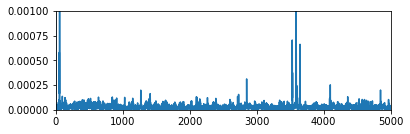

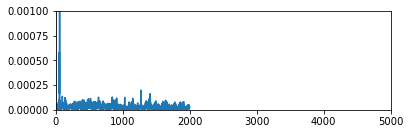

In [18]:
# FFT_Spindle
def fft_spindle(data):
    # FFT
    N = len(data) # 10000 (1초간 10000개 data 측정)
    T = 1.0 / 10000 # 측정 주기
    amp_x_dis = fft(data['x_dis'].values) # fft 결과 x_dis 열의 amplitude 값
    amp_y_dis = fft(data['y_dis'].values) # fft 결과 y_dis 열의 amplitude 값
    amp_x_dis = 2.0/N * np.abs(amp_x_dis[:N//2]) # 반만 필요
    amp_y_dis = 2.0/N * np.abs(amp_y_dis[:N//2])
    freq = np.linspace(0.0, 1.0/(2.0*T), N//2) # frequency (반만 가져옴)
    return freq, amp_x_dis, amp_y_dis

# FFT_Spindle
def fft_spindle_2000Hz(data):
    # FFT
    N = len(data) # 10000 (1초간 10000개 data 측정)
    T = 1.0 / 10000 # 측정 주기
    amp_x_dis = fft(data['x_dis'].values) # fft 결과 x_dis 열의 amplitude 값
    amp_y_dis = fft(data['y_dis'].values) # fft 결과 y_dis 열의 amplitude 값
    amp_x_dis = 2.0/N * np.abs(amp_x_dis[:N//2]) # 반만 필요
    amp_y_dis = 2.0/N * np.abs(amp_y_dis[:N//2])
    amp_x_dis = amp_x_dis[:2000]
    amp_y_dis = amp_x_dis[:2000]
    freq = np.linspace(0.0, 1.0/(2.0*T), N//2) # frequency (반만 가져옴)
    freq = np.linspace(0.0, float(len(amp_x_dis)), len(amp_x_dis)) # 2000Hz까지만
    return freq, amp_x_dis, amp_y_dis

# 65000번째 1초간 data 입력 시 fft 변환 결과

frequency, amplitude_x, amplitude_y = fft_spindle(t_data[65000])
frequency_2000Hz, amplitude_x_2000Hz, amplitude_y_2000Hz = fft_spindle_2000Hz(t_data[65000])

plt.subplot(2, 1, 1)
plt.plot(frequency, amplitude_x)
plt.xlim(0, 5000)
plt.ylim(0, 0.001)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(frequency_2000Hz, amplitude_x_2000Hz)
plt.xlim(0, 5000)
plt.ylim(0, 0.001)
plt.show()

* 2000Hz 이상 주파수부터는 의미 x

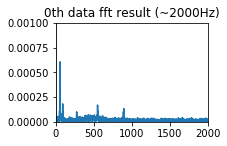

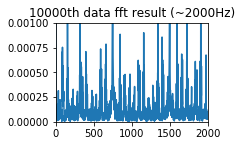

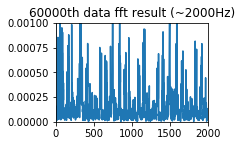

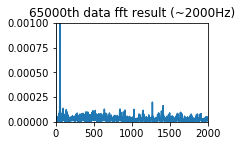

In [42]:
# until 2000Hz

frequency_0, amplitude_x_0, amplitude_y_0 = fft_spindle_2000Hz(t_data[0])
frequency_1, amplitude_x_1, amplitude_y_1 = fft_spindle_2000Hz(t_data[10000])
frequency_2, amplitude_x_2, amplitude_y_2 = fft_spindle_2000Hz(t_data[60000])
frequency_3, amplitude_x_3, amplitude_y_3 = fft_spindle_2000Hz(t_data[65000])

plt.subplot(2,2,1)
plt.plot(frequency_0, amplitude_x_0)
plt.xlim(0, 2000)
plt.ylim(0, 0.001)
plt.title('0th data fft result (~2000Hz)')
plt.show()

plt.subplot(2,2,2)
plt.plot(frequency_1, amplitude_x_1)
plt.xlim(0, 2000)
plt.ylim(0, 0.001)
plt.title('10000th data fft result (~2000Hz)')
plt.show()

plt.subplot(2,2,3)
plt.plot(frequency_2, amplitude_x_2)
plt.xlim(0, 2000)
plt.ylim(0, 0.001)
plt.title('60000th data fft result (~2000Hz)')
plt.show()

plt.subplot(2,2,4)
plt.plot(frequency_3, amplitude_x_3)
plt.xlim(0, 2000)
plt.ylim(0, 0.001)
plt.title('65000th data fft result (~2000Hz)')
plt.show()

## 3) 새로운 DF 생성 (~2000Hz)

In [19]:
threshold = 0.001

filteredFreq = []
numPop_total = [] # x, y distance 총 튄 값 개수
numPop_x = [] # x distance 튄 값 개수 list
numPop_y = [] # y distance 튄 값 개수 list
popVal_x = [] # x distance 튄 값들의 평균값 list
popVal_y = [] # y distance 튄 값들의 평균값 list
popVal_mean = [] # x, y 전체 튄 값들의 평균값 list

for i in range(len(t_data)): # 30000 기준으로 두 번 나눠서 진행! (kernel 죽음..)
    freq, pop_x, pop_y = fft_spindle_2000Hz(t_data[i])
    pop_x[0] = 0 # 맨 처음 값은 FFT 특성 상 큰 값을 가지므로 무시
    pop_y[0] = 0
    freq = np.where(((pop_x > threshold) | (pop_y > threshold)), freq, 0)
    # print(len(freq))
    # print(np.count_nonzero(freq))
    pop_x = np.where(pop_x > threshold, pop_x, 0) # 튄 값만 그대로 두고 나머지는 0
    pop_y = np.where(pop_y > threshold, pop_y, 0)
    # print(len(pop_x))
    # print(np.count_nonzero(pop_x))
    
    filteredFreq.append(freq[np.nonzero(freq)]) # 튄 값의 freq를 하나의 리스트로
    numPop_total.append(np.count_nonzero(freq))
    numPop_x.append(np.count_nonzero(pop_x))
    numPop_y.append(np.count_nonzero(pop_y))
    popVal_x.append(np.sum(pop_x) / np.count_nonzero(pop_x))
    popVal_y.append(np.sum(pop_y) / np.count_nonzero(pop_y))
    popVal_mean.append((np.sum(pop_x) + np.sum(pop_y)) /
                       (np.count_nonzero(pop_x) + np.count_nonzero(pop_y)))
    
    if i % 10000 == 0:
        print(str(i) + ' data transformed.')

print(pop_x)
print(len(t_data[65000]))
# print(numPop_x)
# print(numPop_y)
# print(popVal)
print()
print(len(filteredFreq), len(numPop_total), len(numPop_x), len(numPop_y),
      len(popVal_x), len(popVal_y), len(popVal_mean))


/Users/jjuke/opt/anaconda3/envs/DataMining/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/jjuke/opt/anaconda3/envs/DataMining/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/jjuke/opt/anaconda3/envs/DataMining/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


0 data transformed.
10000 data transformed.
20000 data transformed.
30000 data transformed.
40000 data transformed.
50000 data transformed.
60000 data transformed.
[0. 0. 0. ... 0. 0. 0.]
10000

66524 66524 66524 66524 66524 66524 66524


In [20]:
# transformed dataframe
transDF = pd.DataFrame({
    'Filtered_freq_list' : filteredFreq,
    'popCount_freq' : numPop_total,
    'popCount_x' : numPop_x,
    'popCount_y' : numPop_y,
    'popDegree_mean_x' : popVal_x,
    'popDegree_mean_y' : popVal_y,
    'popDegree_total_mean' : popVal_mean
})
print(transDF)

                                      Filtered_freq_list  popCount_freq  \
0                                                     []              0   
1                                                     []              0   
2                                                     []              0   
3                                                     []              0   
4      [1.0005002501250626, 2.001000500250125, 3.0015...             24   
...                                                  ...            ...   
66519                                                 []              0   
66520                                                 []              0   
66521                                                 []              0   
66522                                                 []              0   
66523                                                 []              0   

       popCount_x  popCount_y  popDegree_mean_x  popDegree_mean_y  \
0               0           0 

In [21]:
transDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  int64  
 2   popCount_x            66524 non-null  int64  
 3   popCount_y            66524 non-null  int64  
 4   popDegree_mean_x      66095 non-null  float64
 5   popDegree_mean_y      66095 non-null  float64
 6   popDegree_total_mean  66095 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.6+ MB


In [22]:
transDF = transDF.astype({'popCount_freq' : 'float64'})
transDF = transDF.astype({'popCount_x' : 'float64'})
transDF = transDF.astype({'popCount_y' : 'float64'})


In [23]:
transDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66095 non-null  float64
 5   popDegree_mean_y      66095 non-null  float64
 6   popDegree_total_mean  66095 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.6+ MB


Text(0.5, 0.92, 'new data')

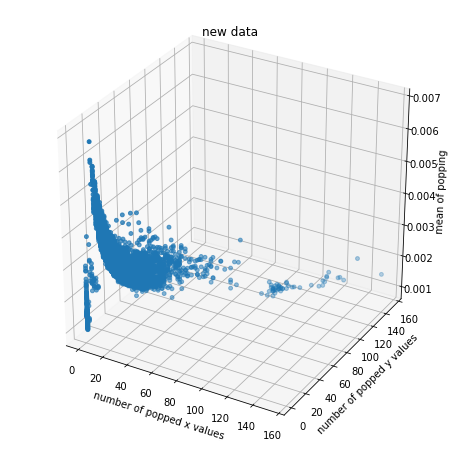

In [24]:
#3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transDF['popCount_x'], transDF['popCount_y'], transDF['popDegree_total_mean'], marker='o', s=15)
ax.set_xlabel('number of popped x values')
ax.set_ylabel('number of popped y values')
ax.set_zlabel('mean of popping')
plt.title('new data')

## 4) transformed dataframe 저장

In [25]:
# trnasformed dataframe pickle로 저장 (~2000Hz)
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_2000Hz.pickle', 'wb') as fw:
     pickle.dump(transDF, fw)

# 2. k-means clustering (k = 4)

## 1) dataframe 정보

In [26]:
# transformed dataframe 불러오기
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_2000Hz.pickle', 'rb') as r:
    transDF = pickle.load(r)

In [27]:
transDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66095 non-null  float64
 5   popDegree_mean_y      66095 non-null  float64
 6   popDegree_total_mean  66095 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.6+ MB


## 2) K-means Clustering with PySpark (failed)

In [51]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.getOrCreate() # initialize SparkSession

dataset = pd.DataFrame({"popCount_x" : transDF['popCount_x'],
                        "popCount_y" : transDF['popCount_y'],
                        "popDegree_mean_x" : transDF['popDegree_mean_x'],
                        "popDegree_mean_y" : transDF['popDegree_mean_y']})
dataset = spark.createDataFrame(dataset)
assembler = VectorAssembler(
    inputCols=["popCount_x", "popCount_y", "popDegree_mean_x", "popDegree_mean_y"]
    , outputCol= "features"
)

dataset = assembler.transform(dataset)
dataset.show()

22/04/14 21:26:07 WARN TaskSetManager: Stage 0 contains a task of very large size (149 KB). The maximum recommended task size is 100 KB.
[Stage 0:>                                                          (0 + 1) / 1]22/04/14 21:26:07 ERROR Executor: Exception in task 0.0 in stage 0.0 (TID 0)
org.apache.spark.SparkException: Failed to execute user defined function(: (struct<popCount_x_double_VectorAssembler_420cb343cf4f:double,popCount_y_double_VectorAssembler_420cb343cf4f:double,popDegree_mean_x:double,popDegree_mean_y:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStag

Py4JJavaError: An error occurred while calling o121.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0, localhost, executor driver): org.apache.spark.SparkException: Failed to execute user defined function(: (struct<popCount_x_double_VectorAssembler_420cb343cf4f:double,popCount_y_double_VectorAssembler_420cb343cf4f:double,popDegree_mean_x:double,popDegree_mean_y:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Encountered NaN while assembling a row with handleInvalid = "error". Consider
removing NaNs from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:258)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:255)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:255)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$4.apply(VectorAssembler.scala:144)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$4.apply(VectorAssembler.scala:143)
	... 22 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1891)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1879)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1878)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1878)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2112)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2061)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2050)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:738)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:365)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3389)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:80)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:127)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:75)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2764)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:254)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:291)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(: (struct<popCount_x_double_VectorAssembler_420cb343cf4f:double,popCount_y_double_VectorAssembler_420cb343cf4f:double,popDegree_mean_x:double,popDegree_mean_y:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: org.apache.spark.SparkException: Encountered NaN while assembling a row with handleInvalid = "error". Consider
removing NaNs from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:258)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:255)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:255)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$4.apply(VectorAssembler.scala:144)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$4.apply(VectorAssembler.scala:143)
	... 22 more


## 3) K-means Clustering with Scikit-learn

### (1) null 값 0으로 대체 : 튄 값이 없어서 Degree가 계산되지 않은 경우

In [28]:
transDF.fillna(0, inplace=True)
transDF.isnull()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
66519,False,False,False,False,False,False,False
66520,False,False,False,False,False,False,False
66521,False,False,False,False,False,False,False
66522,False,False,False,False,False,False,False


### (2) Scikit-learn

In [29]:
# Scikit-Learn
from sklearn.cluster import KMeans

dataset = pd.DataFrame({"popCount_x" : transDF['popCount_x'],
                        "popCount_y" : transDF['popCount_y'],
                        "popDegree_mean_x" : transDF['popDegree_mean_x'],
                        "popDegree_mean_y" : transDF['popDegree_mean_y']})
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
kmeans_label = kmeans.labels_

print(kmeans.score(dataset))

print("k-means labels")
print(kmeans_label)
print()
print()

print("k-means cluster centers")
print(kmeans.cluster_centers_)
predictions = kmeans.fit_predict(dataset)

resDF = transDF.copy()
resDF["prediction"] = kmeans.labels_
resDF.head()

-1033336.4641069641
k-means labels
[0 0 0 ... 0 0 0]


k-means cluster centers
[[1.21107660e+01 1.21107660e+01 3.24248886e-03 3.24248886e-03]
 [1.86359961e+01 1.86359961e+01 2.90083015e-03 2.90083015e-03]
 [2.44935396e+01 2.44935396e+01 2.64920018e-03 2.64920018e-03]
 [8.65274725e+01 8.65274725e+01 1.96248642e-03 1.96248642e-03]]


,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean,prediction
0,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
1,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
2,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
3,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
4,"[1.0005002501250626, 2.001000500250125, 3.0015...",24.0,24.0,24.0,0.002314,0.002314,0.002314,1


### (3) Plot

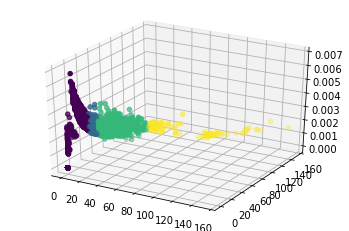

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(dataset['popCount_x'], dataset['popCount_y'], dataset['popDegree_mean_x'], c=kmeans_label)

# 3. Analysis of Clustering

# 4. k-means clustering (k = 3)

## 1) dataframe 정보

In [37]:
# transformed dataframe 불러오기
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_2000Hz.pickle', 'rb') as r:
    transDF = pickle.load(r)

In [38]:
transDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66095 non-null  float64
 5   popDegree_mean_y      66095 non-null  float64
 6   popDegree_total_mean  66095 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.6+ MB


## 3) K-means Clustering with Scikit-learn

### (1) null 값 0으로 대체 : 튄 값이 없어서 Degree가 계산되지 않은 경우

In [39]:
transDF.fillna(0, inplace=True)
transDF.isnull()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
66519,False,False,False,False,False,False,False
66520,False,False,False,False,False,False,False
66521,False,False,False,False,False,False,False
66522,False,False,False,False,False,False,False


### (2) Scikit-learn

In [41]:
# Scikit-Learn
from sklearn.cluster import KMeans

dataset = pd.DataFrame({"popCount_x" : transDF['popCount_x'],
                        "popCount_y" : transDF['popCount_y'],
                        "popDegree_mean_x" : transDF['popDegree_mean_x'],
                        "popDegree_mean_y" : transDF['popDegree_mean_y']})
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
kmeans_label = kmeans.labels_

print(kmeans.score(dataset))

print("k-means labels")
print(kmeans_label)
print()
print()

print("k-means cluster centers")
print(kmeans.cluster_centers_)
predictions = kmeans.fit_predict(dataset)

resDF = transDF.copy()
resDF["prediction"] = kmeans.labels_
resDF.head()

-1639492.7199991182
k-means labels
[1 1 1 ... 1 1 1]


k-means cluster centers
[[2.21810801e+01 2.21810801e+01 2.74036757e-03 2.74036757e-03]
 [1.48377178e+01 1.48377178e+01 3.10179709e-03 3.10179709e-03]
 [8.48437500e+01 8.48437500e+01 1.99368701e-03 1.99368701e-03]]


,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean,prediction
0,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
1,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
2,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
3,[],0.0,0.0,0.0,0.000000,0.000000,0.000000,2
4,"[1.0005002501250626, 2.001000500250125, 3.0015...",24.0,24.0,24.0,0.002314,0.002314,0.002314,1


### (3) Plot

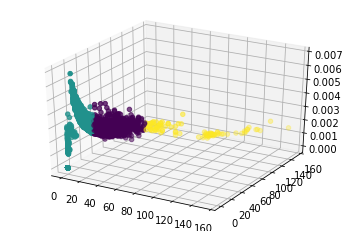

In [42]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(dataset['popCount_x'], dataset['popCount_y'], dataset['popDegree_mean_x'], c=kmeans_label)

In [90]:
import random

## 1) Visualize the Frequency Distribution of each Clustered Data

### (1) Extract the data by each cluster and rand number

In [94]:
# cluster별 data 추출
cluster_0 = resDF[resDF.prediction == 0]
cluster_1 = resDF[resDF.prediction == 1]
cluster_2 = resDF[resDF.prediction == 2]

print(len(dataset))
print(len(cluster_0) + len(cluster_1) + len(cluster_2))
print(len(cluster_0), len(cluster_1), len(cluster_2))

66524
66433
9955 23788 32690


In [95]:
random.seed(2021)
randInd_0 = random.randrange(0, len(cluster_0))
randInd_1 = random.randrange(0, len(cluster_1))
randInd_2 = random.randrange(0, len(cluster_2))

print(randInd_0)
print(randInd_1)
print(randInd_2)

6622
20635
17829


### (2) Cluster의 random point 별 Frequency 분포 확인

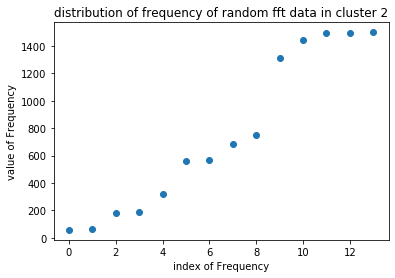

In [99]:
plt.plot(cluster_0.iloc[randInd_0]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 0')
plt.show()

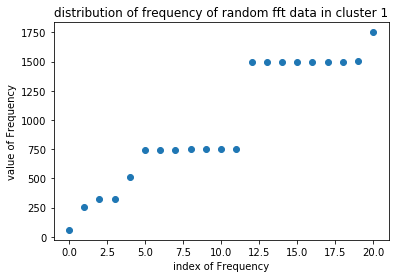

In [100]:
plt.plot(cluster_1.iloc[randInd_1]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 1')
plt.show()

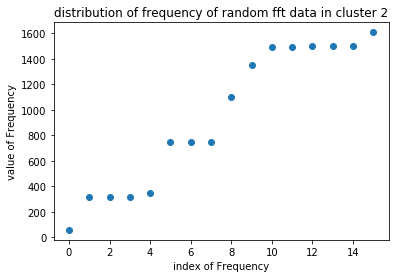

In [101]:
plt.plot(cluster_2.iloc[randInd_2]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 2')
plt.show()

### (3) 다시 time domain에 cluster 색 별로 plot

In [103]:
len(resDF)

66524

66524
66524


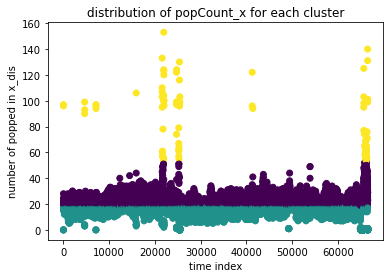

In [43]:
x = np.linspace(0,len(resDF), len(resDF))
print(len(x))
print(len(resDF['popCount_x']))
plt.scatter(x, resDF['popCount_x'], c=kmeans_label) #resDF['prediction'])
plt.xlabel('time index')
plt.ylabel('number of popped in x_dis')
plt.title('distribution of popCount_x for each cluster')
plt.show()

In [2]:
print(len(resDF['prediction'] == 0))
print(len(resDF.loc[(resDF['prediction'] == 1)]))
print(resDF.loc[resDF['prediction'] == 0 or resDF['prediction'] == 1 or resDF['prediction'] == 2 or resDF['prediction'] == 3])

NameError: name 'resDF' is not defined

In [ ]:
print(resDF.loc[resDF['prediction']])